# HiFi Prototype User Study

## Load Data and Package

In [ ]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import requests

In [ ]:
!pip install --upgrade pandas requests
import io
import pandas as pd
import requests

# Load the dataset
url = 'https://docs.google.com/spreadsheets/d/1lTilQ7sD0WpJHEgLYJa9wLY88P_MGarj2jKWXCNVge8/export?format=csv&gid=1453400364'  # Replace with the URL of your public CSV file, ensure you use export?format=csv&gid=YOURGID
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Use StringIO to create a file-like object
content = io.StringIO(response.content.decode('utf-8'))

# Read the CSV content into a DataFrame
df_protocol = pd.read_csv(content)

url = 'https://docs.google.com/spreadsheets/d/1vP-CfnnX_Dth2ROM7ivGTYxBdadex2Qen-_YseskJhs/export?format=csv&gid=1476832427'  # Replace with the URL of your public CSV file, ensure you use export?format=csv&gid=YOURGID
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Use StringIO to create a file-like object
content = io.StringIO(response.content.decode('utf-8'))

# Read the CSV content into a DataFrame
df_user = pd.read_csv(content)

# Display the first few rows of the data
print(df_protocol)

            Zeitstempel  (1A) Time taken  \
0   03.12.2024 18:14:59               26   
1   03.12.2024 20:35:14               56   
2   03.12.2024 22:33:59               35   
3   03.12.2024 22:35:05              164   
4   03.12.2024 23:34:46               45   
5   04.12.2024 10:42:10               15   
6   04.12.2024 10:45:32               24   
7   04.12.2024 12:37:42              300   
8   04.12.2024 13:45:29               21   
9   04.12.2024 20:51:44               10   
10  04.12.2024 21:04:26              112   
11  05.12.2024 00:41:16               50   

                             (1A) Mistakes, Confusion  (2A) Time taken  \
0                                                   0               33   
1   the user first clicked on a category where he ...               37   
2   didn't get the difference first between protot...               22   
3   swiping on own tasks in trade, unclear how to ...               63   
4   Thought blossom belongs to other category; Siz...    

## Hypothesis 1

- *H1.1*: For a small amount of distributed tasks the diagram presented in prototype A allows for a faster task execution.
- *H1.1_0*: For a small amount of distributed tasks there is no difference in task execution speed between the two diagrams presented in prototypes A and B.  

- *H1.2*: For medium amount of distributed tasks the diagram presented in prototype B allows for a faster task execution.
- *H1.2_0*: For a medium amount of distributed tasks there is no difference in task execution speed between the two diagrams presented in prototypes A and B.  

- *H1.3*: For large amount of distributed tasks the diagram presented in prototype B allows for a faster task execution.
- *H1.3_0*: For a large amount of distributed tasks there is no difference in task execution speed between the two diagrams presented in prototypes A and B.

### Step 1. Check properties of data

#### 1.1 Isolating the data


In [ ]:
# isolate time measurements
df_times = df_protocol[df_protocol.columns[df_protocol.columns.str.contains('Time')]]
df_times.head()

,(1A) Time taken,(2A) Time taken,(3A) Time taken,(1B) Time taken,(2B) Time taken,(3B) Time taken
0,26,33,22,22,18,17
1,56,37,30,27,19,17
2,35,22,21,133,58,38
3,164,63,43,74,51,60
4,45,12,22,40,35,24


In [ ]:
# isolate first tasks
df_task_1 = df_times[df_times.columns[df_times.columns.str.contains("1")]]
df_task_1.head()

,(1A) Time taken,(1B) Time taken
0,26,22
1,56,27
2,35,133
3,164,74
4,45,40


In [ ]:
# isolate second tasks
df_task_2 = df_times[df_times.columns[df_times.columns.str.contains("2")]]
df_task_2.head()

,(2A) Time taken,(2B) Time taken
0,33,18
1,37,19
2,22,58
3,63,51
4,12,35


In [ ]:
# isolate third tasks
df_task_3 = df_times[df_times.columns[df_times.columns.str.contains("3")]]
df_task_3.head()

,(3A) Time taken,(3B) Time taken
0,22,17
1,30,17
2,21,38
3,43,60
4,22,24


#### 1.2 Descriptive Statistics

In [ ]:
# Get descriptive statistics for the easy task condition, grouped by controller
df_task_1.describe()

,(1A) Time taken,(1B) Time taken
count,12.000,12.000000
mean,71.500,68.000000
std,84.744,49.508493
min,10.000,18.000000
25%,23.250,32.250000
50%,40.000,53.000000
75%,70.000,87.000000
max,300.000,171.000000


In [ ]:
df_task_2.describe()

,(2A) Time taken,(2B) Time taken
count,12.000000,12.000000
mean,51.833333,70.250000
std,51.059383,69.987174
min,12.000000,18.000000
25%,23.500000,25.750000
50%,31.500000,44.000000
75%,57.000000,84.000000
max,184.000000,262.000000


In [ ]:
df_task_3.describe()

,(3A) Time taken,(3B) Time taken
count,12.000000,12.000000
mean,44.416667,40.666667
std,30.844060,25.259862
min,12.000000,13.000000
25%,22.000000,22.250000
50%,32.000000,36.000000
75%,59.500000,56.000000
max,106.000000,102.000000


#### 1.3 Visualize Distributions

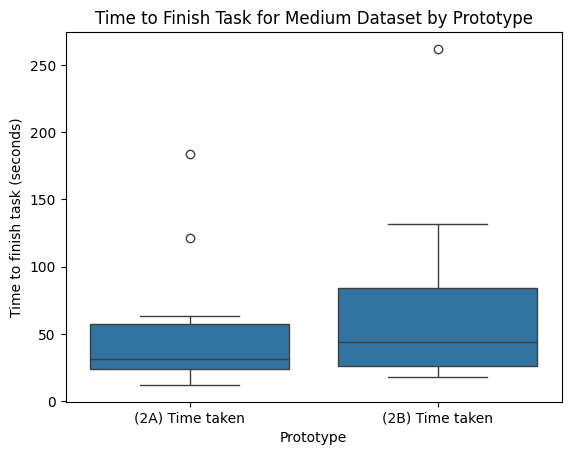

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

melted = pd.melt(df_task_2, var_name='Columns', value_name='Time')
# Create the box plot
sns.boxplot(x="Columns", y="Time", data=melted)

# Customize the plot (optional)
plt.title("Time to Finish Task for Medium Dataset by Prototype")
plt.xlabel("Prototype")
plt.ylabel("Time to finish task (seconds)")

# Display the plot
plt.show()

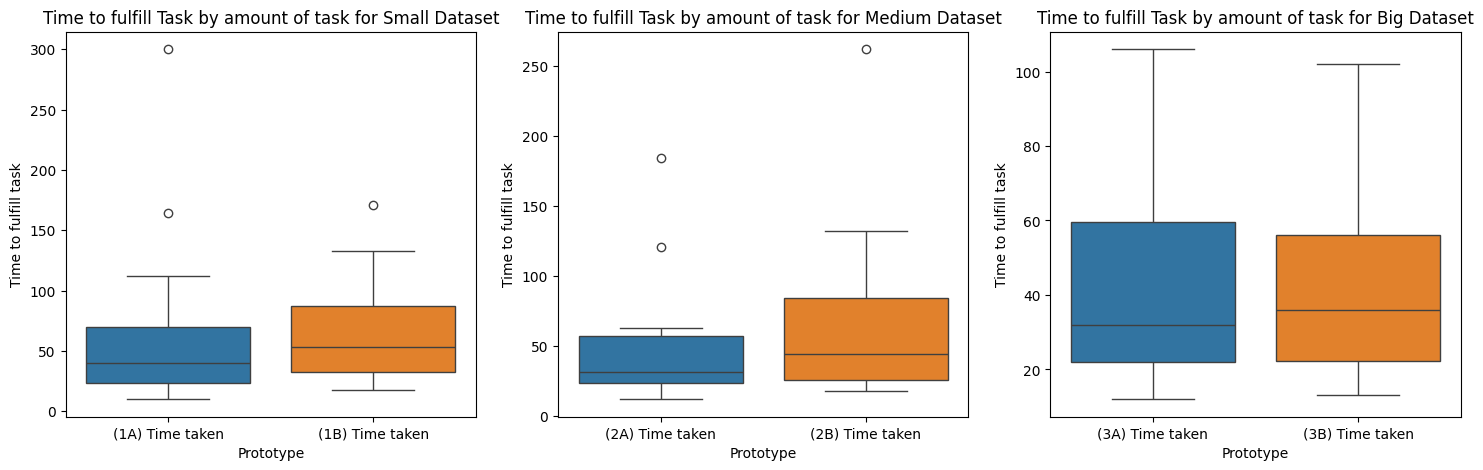

In [ ]:
# Visualize the spread and central tendency with boxplot
task1 = pd.melt(df_task_1, var_name='Columns', value_name='Time')
task2 = pd.melt(df_task_2, var_name='Columns', value_name='Time')
task3 = pd.melt(df_task_3, var_name='Columns', value_name='Time')
# List of dataframes and task names for labeling
task_data = [task1, task2, task3]
task_names = ["Small Dataset", "Medium Dataset", "Big Dataset"]

# Set up a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Loop through each dataset and create a boxplot for each
for i, (data, task_name) in enumerate(zip(task_data, task_names), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Columns", y="Time", data=data,  hue='Columns')
    plt.title(f"Time to fulfill Task by amount of task for {task_name}")
    plt.xlabel("Prototype")
    plt.ylabel("Time to fulfill task")

plt.show()

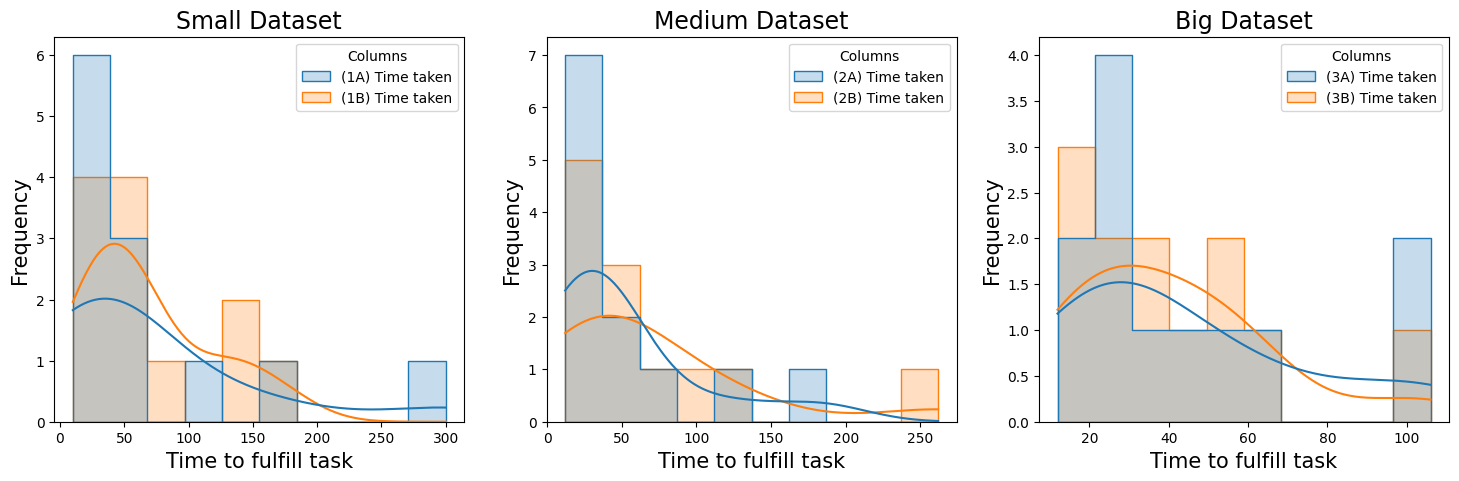

In [ ]:
# Show the frequency distribution of data using histogram

# Set up a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Loop through each dataset and create a histogram for each
for i, (data, task_name) in enumerate(zip(task_data, task_names), 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x="Time", hue="Columns", kde=True, bins=10, element="step")
    plt.title(f"{task_name}", fontsize=17)
    plt.xlabel("Time to fulfill task", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)

plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust values as needed

plt.show()

#### 1.4 Test Normality

In [ ]:
# Now we want to gain more confidence of our visual exploration using a statistical measure of normality
from scipy.stats import shapiro

# Shapiro-Wilk test for each controller in the easy task condition

for prototype in df_task_1.columns:
    data = df_task_1[prototype]
    stat, p_value = shapiro(data)
    print(f"{prototype} - Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("The data is likely not normally distributed.")
    else:
        print("The data is likely normally distributed.")

(1A) Time taken - Shapiro-Wilk Test: Statistic=0.713, p-value=0.001
The data is likely not normally distributed.
(1B) Time taken - Shapiro-Wilk Test: Statistic=0.866, p-value=0.058
The data is likely normally distributed.


In [ ]:
# Loop through each dataset and each controller to perform Shapiro-Wilk test
for data, task_name in zip(task_data, task_names):
    print(f"Shapiro-Wilk Test for {task_name} Condition:")
    prototypes = data['Columns'].unique()
    for prototype in prototypes:
        controller_data = data[data['Columns'] == prototype]['Time']
        stat, p_value = shapiro(controller_data)
        print(f"  {prototype} - Statistic={stat:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            print("    The data is likely not normally distributed.")
        else:
            print("    The data is likely normally distributed.")
    print("\n")

Shapiro-Wilk Test for Small Dataset Condition:
  (1A) Time taken - Statistic=0.713, p-value=0.001
    The data is likely not normally distributed.
  (1B) Time taken - Statistic=0.866, p-value=0.058
    The data is likely normally distributed.


Shapiro-Wilk Test for Medium Dataset Condition:
  (2A) Time taken - Statistic=0.729, p-value=0.002
    The data is likely not normally distributed.
  (2B) Time taken - Statistic=0.743, p-value=0.002
    The data is likely not normally distributed.


Shapiro-Wilk Test for Big Dataset Condition:
  (3A) Time taken - Statistic=0.848, p-value=0.034
    The data is likely not normally distributed.
  (3B) Time taken - Statistic=0.888, p-value=0.111
    The data is likely normally distributed.




### Step 2. Select Statistical Test

We will conduct a Wilcoxon Signed-Rank Test as our data holds the following assumption:

- Paired/Dependent: Observations in each pair are related
- Continuous Variable: Dependent variable should be continuous
- Normality of Differences:	Differences between pairs is not normally distributed
- Interval Data

### Step 3. Perform Hypothesis Testing

#### 3.1 Calculate p-value

**Easy Task Version**

In [ ]:
from scipy.stats import wilcoxon

# Separate the data for each controller
time_a = df_task_3[df_task_3.columns[df_task_3.columns.str.contains("A")]]
time_b = df_task_3[df_task_3.columns[df_task_3.columns.str.contains("B")]]
# time_b = easy_task_data[easy_task_data['Controller'] == 'Controller']['Time_to_Select']

time_a = time_a.to_numpy().reshape(-1)
time_b = time_b.to_numpy().reshape(-1)
stat, p_value = wilcoxon(time_a, time_b)

print("Wilcoxon Signed-Rank Test results for Time to Select Target (Easy Task):")
print(f"t-statistic: {stat:.3f}, p-value: {p_value:.3f}")

Wilcoxon Signed-Rank Test results for Time to Select Target (Easy Task):
t-statistic: 30.500, p-value: 0.824


**Loop through each dataset**

In [ ]:
from scipy.stats import wilcoxon

# Loop through each dataset and perform Wilcoxon Signed-Rank Test for each task difficulty level
for data, task_name in zip(task_data, task_names):
    # Separate the data for each controller
    df_task_3.columns[df_task_3.columns.str.contains("A")]
    protoA_data = data[data['Columns'].str.contains("A")]['Time'].to_numpy().reshape(-1)
    protoB_data = data[data['Columns'].str.contains("B")]['Time'].to_numpy().reshape(-1)
    # controller_data = data[data['Controller'] == 'Controller']['Wrongly_Selected_Target']
    # # Perform Wilcoxon Signed-Rank Test
    stat, p_value = wilcoxon(protoA_data,protoB_data)
    print(f"Wilcoxon Signed-Rank Test results for error numbers ({task_name}):")
    print(f"Test statistic: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret results
    if p_value < 0.05:
        print(f"There is a statistically significant difference in solving time between Prototype A and B for the {task_name}.\n")
    else:
        print(f"There is no statistically significant difference in solving time between Prototype A and B for the {task_name}.\n")

Wilcoxon Signed-Rank Test results for error numbers (Small Dataset):
Test statistic: 35.000, p-value: 0.791
There is no statistically significant difference in solving time between Prototype A and B for the Small Dataset.

Wilcoxon Signed-Rank Test results for error numbers (Medium Dataset):
Test statistic: 23.000, p-value: 0.233
There is no statistically significant difference in solving time between Prototype A and B for the Medium Dataset.

Wilcoxon Signed-Rank Test results for error numbers (Big Dataset):
Test statistic: 30.500, p-value: 0.824
There is no statistically significant difference in solving time between Prototype A and B for the Big Dataset.



#### Step 4. Write up the results

[small dataset]

To compare the effect of the diagrams of the two prototypes on the number solving time of the given task which is trading a task with another household member in order to improve parity in task distribution among all users in all respective categories, we conducted a Wilcoxon Signed-Rank Test, as the data from Prototype A did not meet the assumptions of normality, in contrary to the data from Prototype B (Prototye A: W=0.713, p=0.001; Prototype B: W=0.866, p=0.058).

For the Prototype A, the mean solving time was M=71.50,SD=84.74.
For the Prototype B, the mean solving time was M=68.00,SD=49.51.

The Wilcoxon Signed-Rank Test showed no statistically significant difference between the two prototypes in solving time, W=35.000,p=0.791.

These results indicate that there was no significant difference in solving time of the given task between the prototypes A and B for a small amount of tasks in the tree.

[medium dataset]

To compare the effect of the diagrams of the two prototypes on the number solving time of the given task which is trading a task with another household member in order to improve parity in task distribution among all users in all respective categories, we conducted a Wilcoxon Signed-Rank Test, as the data from the prototypes did not meet the assumptions of normality(Prototye A: W=0.729, p=0.002; Prototype B: W=0.743, p=0.002).

For the Prototype A, the mean solving time was M=51.83,SD=51.06.
For the Prototype B, the mean solving time was M=70.25.00,SD=69.99.

The Wilcoxon Signed-Rank Test showed no statistically significant difference between the two prototypes in solving time, W=23.00,p=0.233.

These results indicate that there was no significant difference in solving time of the given task between the prototypes A and B for a small amount of tasks in the tree.

[big dataset]

To compare the effect of the diagrams of the two prototypes on the number solving time of the given task which is trading a task with another household member in order to improve parity in task distribution among all users in all respective categories, we conducted a Wilcoxon Signed-Rank Test, as the data from Prototype A did not meet the assumptions of normality, in contrary to the data from Prototype B (Prototye A: W=0.848, p=0.034; Prototype B: W=0.888, p=0.111).

For the Prototype A, the mean solving time was M=44.42,SD=30.84.
For the Prototype B, the mean solving time was M=40.67,SD=25.26.

The Wilcoxon Signed-Rank Test showed no statistically significant difference between the two prototypes in solving time, W=35.000,p=0.824.

These results indicate that there was no significant difference in solving time of the given task between the prototypes A and B for a small amount of tasks in the tree.

# Hypothesis 3

H3: The user will perceive the tasks completed with prototype B as more difficult than with prototype A

H3_0: The user will find solving the tasks with both prototypes to be of the same difficulty, or find A to be more difficult than B.

## Evaluate perceived task difficulty

In [ ]:
def get_first_character(value):
  """Extracts the first character of a string."""
  char = str(value)[0]
  try:
    val = int(char)
  except (TypeError, IndexError):
    return None  # Return None for non-string or empty values
  return val


In [ ]:
task_difficulties = df_user[df_user.columns[df_user.columns.str.contains("Overall")]].dropna()
task_difficulties.head()

,(1A) Overall this task was?,(2A) Overall this task was?,(3A) Overall this task was?,(1B) Overall this task was?,(2B) Overall this task was?,(3B) Overall this task was?
1,4 - Easy,4 - Easy,4 - Easy,4 - Easy,4 - Easy,2 - Difficult
2,2 - Difficult,2 - Difficult,3 - Medium,3 - Medium,4 - Easy,4 - Easy
3,4 - Easy,4 - Easy,4 - Easy,3 - Medium,4 - Easy,5 - Very Easy
4,4 - Easy,4 - Easy,4 - Easy,4 - Easy,4 - Easy,4 - Easy
5,3 - Medium,5 - Very Easy,4 - Easy,4 - Easy,4 - Easy,3 - Medium


<ipython-input-51-ac43662de515>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  task_difficulties_int = task_difficulties_reorder.applymap(get_first_character)


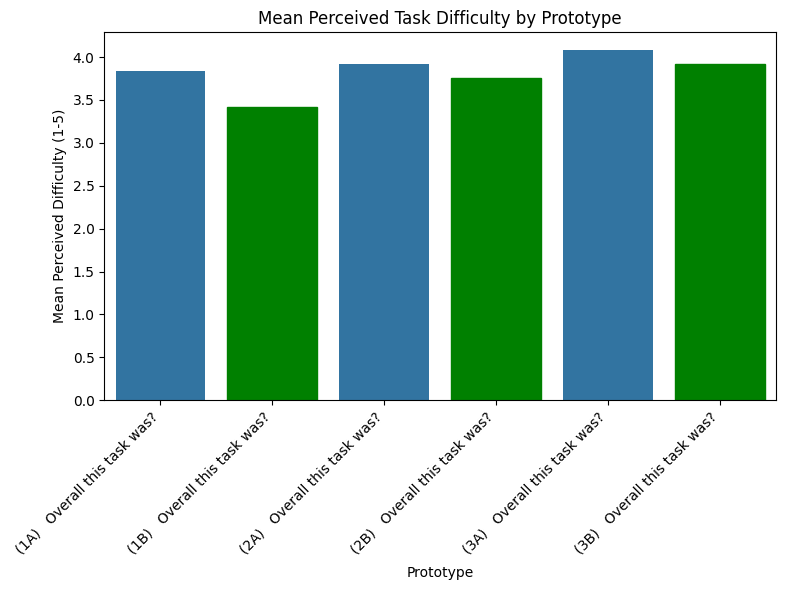

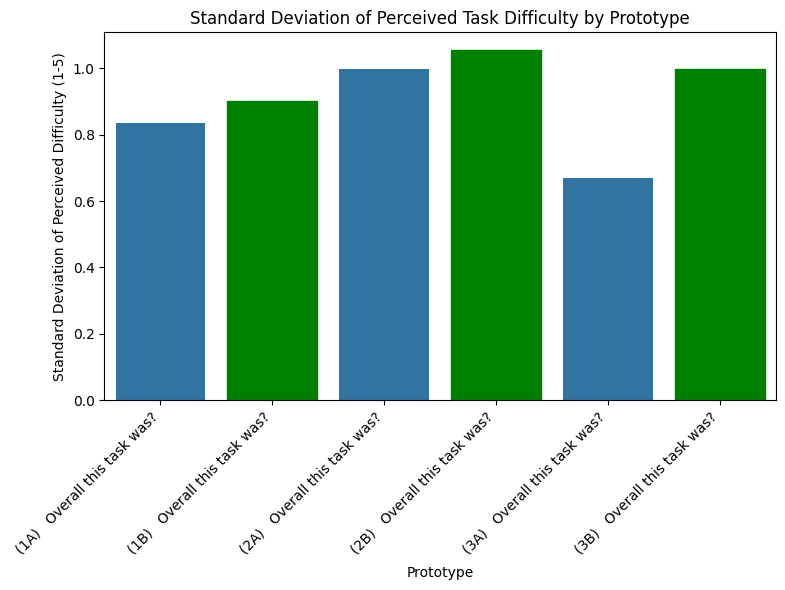

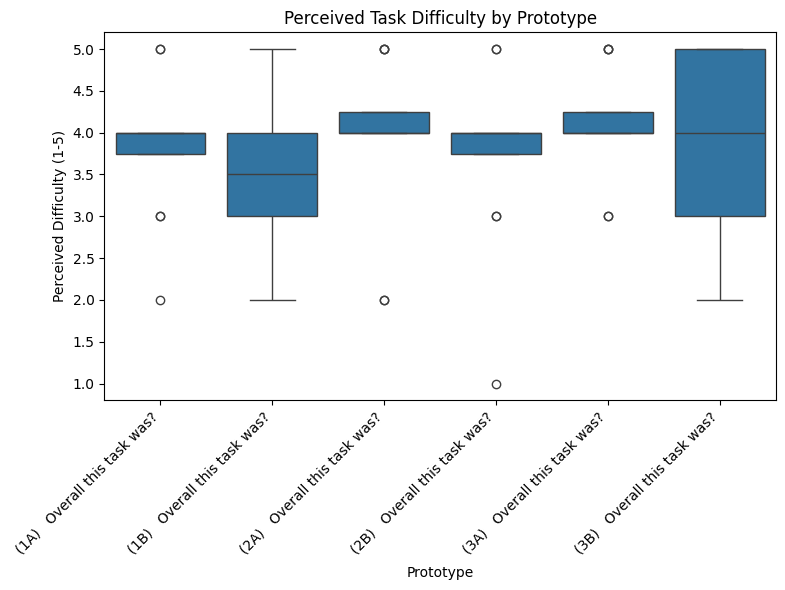

,(1A) Overall this task was?,(1B) Overall this task was?,(2A) Overall this task was?,(2B) Overall this task was?,(3A) Overall this task was?,(3B) Overall this task was?
count,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,3.833333,3.416667,3.916667,3.75000,4.083333,3.916667
std,0.834847,0.900337,0.996205,1.05529,0.668558,0.996205
min,2.000000,2.000000,2.000000,1.00000,3.000000,2.000000
25%,3.750000,3.000000,4.000000,3.75000,4.000000,3.000000
50%,4.000000,3.500000,4.000000,4.00000,4.000000,4.000000
75%,4.000000,4.000000,4.250000,4.00000,4.250000,5.000000
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000


In [ ]:
# Get the column names
columns = task_difficulties.columns.tolist()

# Reorder the columns
reordered_columns = [None] * len(columns)  # Initialize with None
reordered_columns[::2] = columns[:3]  # First three columns in odd positions
reordered_columns[1::2] = columns[3:]  # Last three columns in even positions

# Reassign the columns to the DataFrame
task_difficulties_reorder = task_difficulties[reordered_columns]
task_difficulties_int = task_difficulties_reorder.applymap(get_first_character)
task_difficulties_mean = task_difficulties_int.mean()
task_difficulties_std = task_difficulties_int.std()



# Create a bar plot with means
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sns.barplot(x=task_difficulties_mean.index, y=task_difficulties_mean.values)
# Get the containers for the bars (rectangles)
bars = ax.containers[0]  # Assuming the first container is the bars

# Change the color of even bars
for i, bar in enumerate(bars):
    if i % 2 != 0:  # Check if the bar index is odd (even bars have odd indices in this case)
        bar.set_color('green')  # Change the color to orange, for example

plt.title("Mean Perceived Task Difficulty by Prototype")
plt.xlabel("Prototype")
plt.ylabel("Mean Perceived Difficulty (1-5)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

# Create a bar plot with std
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sns.barplot(x=task_difficulties_std.index, y=task_difficulties_std.values)
# Get the containers for the bars (rectangles)
bars = ax.containers[0]  # Assuming the first container is the bars

# Change the color of even bars
for i, bar in enumerate(bars):
    if i % 2 != 0:  # Check if the bar index is odd (even bars have odd indices in this case)
        bar.set_color('green')  # Change the color to orange, for example

plt.title("Standard Deviation of Perceived Task Difficulty by Prototype")
plt.xlabel("Prototype")
plt.ylabel("Standard Deviation of Perceived Difficulty (1-5)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


# Box plot
# Melt the DataFrame to a long-form structure
melted_data = pd.melt(
    task_difficulties_int,
    var_name="Prototype",
    value_name="Difficulty",
)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
# Modified line: Using melted_data with sns.boxplot
ax = sns.boxplot(x="Prototype", y="Difficulty", data=melted_data)
# Get the boxes (patches) from the box plot
boxes = ax.artists

# Change the color of even boxes
for i, box in enumerate(boxes):
    if i % 2 != 0:  # Check if the box index is odd (even boxes have odd indices)
        box.set_facecolor('green')  # Change the fill color to orange

plt.title("Perceived Task Difficulty by Prototype")
plt.xlabel("Prototype")
plt.ylabel("Perceived Difficulty (1-5)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

task_difficulties_int.describe()

In [ ]:
# prototype A
task_difficulties_mean[::2].describe()

,0
count,3.000000
mean,3.944444
std,0.127294
min,3.833333
25%,3.875000
50%,3.916667
75%,4.000000
max,4.083333


In [ ]:
# prototype B
task_difficulties_mean[1::2].describe()

,0
count,3.000000
mean,3.694444
std,0.254588
min,3.416667
25%,3.583333
50%,3.750000
75%,3.833333
max,3.916667


In [ ]:
from scipy.stats import shapiro

# Loop through each column (prototype and task) in task_difficulties_int
for column in task_difficulties_int.columns:
    data = task_difficulties_int[column].dropna()  # Remove missing values (NaN)
    stat, p_value = shapiro(data)
    print(f"{column} - Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("The data is likely not normally distributed.")
    else:
        print("The data is likely normally distributed.")
    print("\n")  # Add a newline for better readability


 (1A)   Overall this task was? - Shapiro-Wilk Test: Statistic=0.843, p-value=0.030
The data is likely not normally distributed.


 (1B)   Overall this task was? - Shapiro-Wilk Test: Statistic=0.894, p-value=0.133
The data is likely normally distributed.


 (2A)   Overall this task was? - Shapiro-Wilk Test: Statistic=0.757, p-value=0.003
The data is likely not normally distributed.


 (2B)   Overall this task was? - Shapiro-Wilk Test: Statistic=0.779, p-value=0.005
The data is likely not normally distributed.


 (3A)   Overall this task was? - Shapiro-Wilk Test: Statistic=0.809, p-value=0.012
The data is likely not normally distributed.


 (3B)   Overall this task was? - Shapiro-Wilk Test: Statistic=0.877, p-value=0.080
The data is likely normally distributed.




In [ ]:
from scipy.stats import wilcoxon

# Define the column pairs for the Wilcoxon test
column_pairs = [[0, 1], [2, 3], [4, 5]]

# Loop through each column pair
for pair in column_pairs:
    # Get the data for the current pair of columns
    data1 = task_difficulties_int.iloc[:, pair[0]].dropna()
    data2 = task_difficulties_int.iloc[:, pair[1]].dropna()

    # Perform the Wilcoxon test
    stat, p_value = wilcoxon(data1, data2)

    # Print the results
    column_names = task_difficulties_int.columns[pair]
    print(f"Wilcoxon Signed-Rank Test for {column_names[0]} vs. {column_names[1]}:")
    print(f"  Statistic={stat:.3f}, p-value={p_value:.3f}")

    # Interpret the results
    if p_value < 0.05:
        print("  There is a statistically significant difference between the two groups.")
    else:
        print("  There is no statistically significant difference between the two groups.")
    print("\n")  # Add a newline for better readability

Wilcoxon Signed-Rank Test for  (1A)   Overall this task was? vs.  (1B)   Overall this task was?:
  Statistic=12.000, p-value=0.201
  There is no statistically significant difference between the two groups.


Wilcoxon Signed-Rank Test for  (2A)   Overall this task was? vs.  (2B)   Overall this task was?:
  Statistic=8.000, p-value=0.589
  There is no statistically significant difference between the two groups.


Wilcoxon Signed-Rank Test for  (3A)   Overall this task was? vs.  (3B)   Overall this task was?:
  Statistic=14.000, p-value=0.566
  There is no statistically significant difference between the two groups.




# Hypothesis 2


H2: The user will prefer prototype B

H2_0: The user will not show preference towards any of the two prototypes

Evaluation with SUS score with eight questions

## Evaluate SUS Score

In [ ]:
prototype_SUS = df_user.dropna().drop(columns=['Timestamp', 'Which Prototype Version did you like more? Why?']).applymap(get_first_character)
prototype_SUS = prototype_SUS[prototype_SUS.columns[~prototype_SUS.columns.str.contains("Overall")]]
prototype_SUS.head()


<ipython-input-54-5c82c5f96347>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  prototype_SUS = df_user.dropna().drop(columns=['Timestamp', 'Which Prototype Version did you like more? Why?']).applymap(get_first_character)


,(A) I found the visualization unnecessarily complex,(A) I thought the visualization was easy to use,(A) I thought that this visualization works well in this use case,(A) I thought the visualization did not help in this use case,(A) I would imagine that most people would learn to use this system very quickly,(A) I found the system very cumbersome,(A) I felt very confident in using the system,(A) I needed to learn a lot of thing before I could get going with the system,(B) I found the visualization unnecessarily complex,(B) I thought the visualization was easy to use,(B) I thought that this visualization works well in this use case,(B) I thought the visualization did not help in this use case,(B) I would imagine that most people would learn to use this system very quickly,(B) I found the system very cumbersome,(B) I felt very confident in using the system,(B) I needed to learn a lot of thing before I could get going with the system
1,4,4,2,4,5,3,4,3,5,2,4,1,5,4,4,2
2,2,3,4,2,3,3,2,4,4,2,2,4,3,4,2,4
3,3,3,3,3,4,3,4,3,2,4,5,1,4,3,4,2
4,2,4,4,2,4,2,4,2,2,4,4,2,4,2,4,2
5,1,4,5,2,5,2,4,2,2,3,4,2,5,2,4,2


In [ ]:
prototype_SUS_A = prototype_SUS[prototype_SUS.columns[prototype_SUS.columns.str.contains("A")]]
prototype_SUS_B = prototype_SUS[prototype_SUS.columns[prototype_SUS.columns.str.contains("B")]]

cols = list(prototype_SUS_A.columns)
cols[0], cols[1] = cols[1], cols[0] # fix column order
prototype_SUS_A = prototype_SUS_A[cols]
X = prototype_SUS_A.mean()[1::2].sum() - 20 # 4 negative wording
Y = prototype_SUS_A.mean()[::2].sum() - 4 # 4 positive wording
SUS_A = (Y - X)* 3.125 # Adjusted for 8 questions


cols = list(prototype_SUS_B.columns)
cols[0], cols[1] = cols[1], cols[0] # fix column order
prototype_SUS_B = prototype_SUS_B[cols]
X = prototype_SUS_B.mean()[1::2].sum() - 20 # 4 negative wording
Y = prototype_SUS_B.mean()[::2].sum() - 4 # 4 positive wording
SUS_B = (Y - X)* 3.125 # Adjusted for 8 questions


print(f"The SUS score form prototype A is {SUS_A}")
print(f"The SUS score form prototype B is {SUS_B}")


The SUS score form prototype A is 70.57291666666666
The SUS score form prototype B is 61.197916666666664


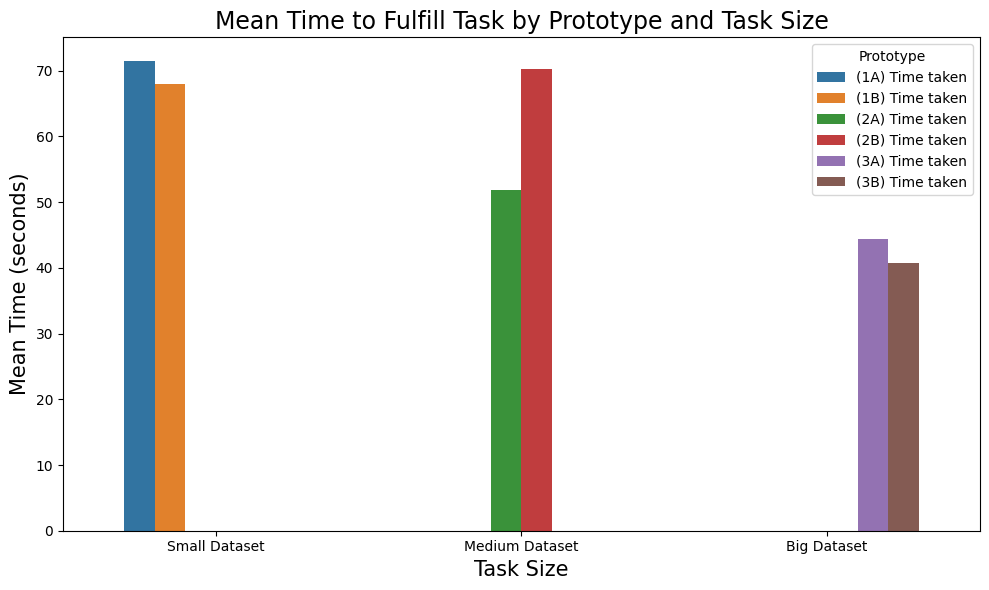

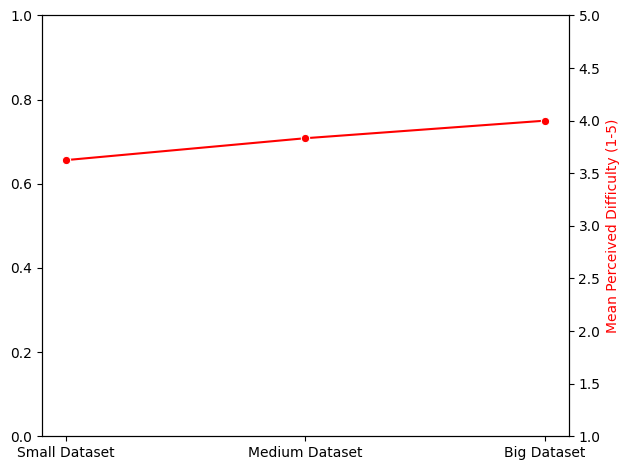

In [ ]:
# plot average solving time per task
# Create a list to store the data for each prototype and task
data = []

# Loop through each task dataframe and extract the data
for task_df, task_name in zip([task1, task2, task3], ["Small Dataset", "Medium Dataset", "Big Dataset"]):
    for prototype in task_df['Columns'].unique():
        # Calculate the mean and standard error for the current prototype and task
        mean_time = task_df[task_df['Columns'] == prototype]['Time'].mean()
        std_err = task_df[task_df['Columns'] == prototype]['Time'].sem()  # Standard error of the mean

        # Append the data to the list
        data.append([task_name, prototype, mean_time, std_err])

# Create a DataFrame from the collected data
df_bar = pd.DataFrame(data, columns=["Task", "Prototype", "Mean Time", "Standard Error"])

# Create the bar plot with error bars
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x="Task", y="Mean Time", hue="Prototype", data=df_bar, errorbar="sd",  width=0.6, dodge=0.1)  # Use standard deviation for error bars
plt.title("Mean Time to Fulfill Task by Prototype and Task Size", fontsize=17)
plt.xlabel("Task Size", fontsize=15)
plt.ylabel("Mean Time (seconds)", fontsize=15)
plt.legend(title="Prototype")
plt.tight_layout()
plt.show()

mean_difficulties = [np.mean(task_difficulties_mean[i:i+2]) for i in range(0, len(task_difficulties_mean), 2)]

# Create a new DataFrame for the mean difficulties
df_mean_diff = pd.DataFrame({"Task": ["Small Dataset", "Medium Dataset", "Big Dataset"], "Mean Difficulty": mean_difficulties})

# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Plot the mean difficulties as a line plot on the secondary y-axis
sns.lineplot(x="Task", y="Mean Difficulty", data=df_mean_diff, ax=ax2, color="red", marker="o")

# Set labels and title for the secondary y-axis
ax2.set_ylabel("Mean Perceived Difficulty (1-5)", color="red")
ax2.set_ylim(1, 5)  # Adjust the y-axis limits as needed

# Customize the plot further if needed
# ...

plt.tight_layout()
plt.show()

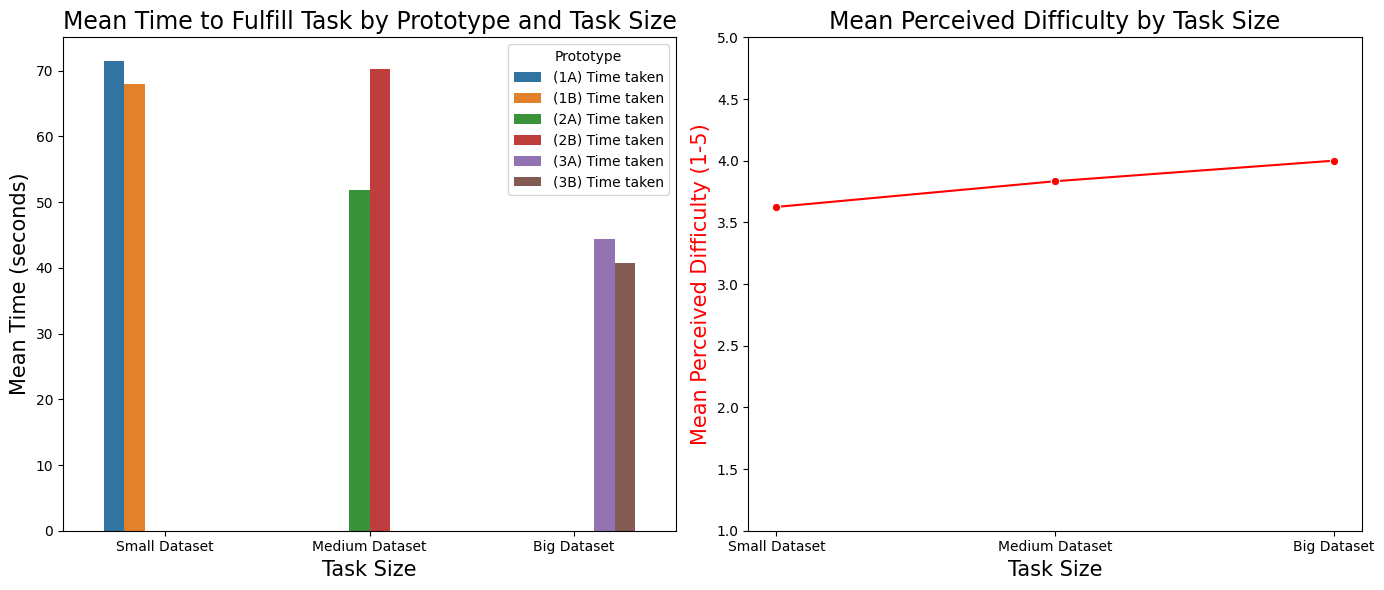

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ... (Previous code to create df_bar and df_mean_diff)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figure size as needed

# Plot the bar plot on the first subplot
sns.barplot(x="Task", y="Mean Time", hue="Prototype", data=df_bar, errorbar="sd", width=0.6, dodge=0.1, ax=axes[0])
axes[0].set_title("Mean Time to Fulfill Task by Prototype and Task Size", fontsize=17)
axes[0].set_xlabel("Task Size", fontsize=15)
axes[0].set_ylabel("Mean Time (seconds)", fontsize=15)
axes[0].legend(title="Prototype")

# Plot the mean difficulties as a line plot on the second subplot
sns.lineplot(x="Task", y="Mean Difficulty", data=df_mean_diff, ax=axes[1], color="red", marker="o")
axes[1].set_title("Mean Perceived Difficulty by Task Size", fontsize=17)
axes[1].set_xlabel("Task Size", fontsize=15)
axes[1].set_ylabel("Mean Perceived Difficulty (1-5)", color="red", fontsize=15)
axes[1].set_ylim(1, 5)  # Adjust the y-axis limits as needed

plt.tight_layout()
plt.show()